## This takes pre as an average of the first 5 quarters. That is 65 weeks
## Assumptions
1. brand sales refers to the amount in sales because it is a float value and the presence of negative values
2. The data in each sample is normally distributed.
3. The data is continuous.
4. The data is a random sample of the true population.
5. Independence of observations

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


C:\Users\judah\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
df = pd.read_csv('study_202.csv')

In [55]:
df.head()

,hhid,reached_flg,num_inds,children_ind,hh_income_ind,age_ind,home_value_ind,state,num_cookies,num_days_online,num_events,brand_sales_q5,brand_sales_q4,brand_sales_q3,brand_sales_q2,brand_sales_q1,brand_sales_post,brand_sales_pre,sales_lift
0,1,0,5,2+,51 to 100,50-59,0 to 100,WV,6,37,247,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,2,0,13,2+,51 to 100,50-59,noValue,MD,3,28,147,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,3,0,17,0,51 to 100,60-64,noValue,MS,3,13,64,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,4,0,12,2+,51 to 100,noValue,noValue,LA,4,8,28,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,5,1,10,2+,51 to 100,20-29,101 to 200,CA,3,12,22,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,6,0,14,2+,0 to 50,noValue,noValue,NJ,6,31,144,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
6,7,1,5,2+,51 to 100,30-39,noValue,LA,3,7,18,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
7,8,1,6,0,noValue,noValue,noValue,VT,3,11,38,0.0,0.0,0.000000,0.000000,0.000000,0.035659,0.000000,0.035659
8,9,0,12,0,51 to 100,50-59,noValue,CA,2,12,48,0.0,0.0,0.514834,0.000000,0.000000,0.269038,0.102967,0.166071
9,10,0,15,1,101 to 150,40-49,noValue,MD,1,15,76,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


Text(0.5, 1.0, 'Distribution of the number of cookies')

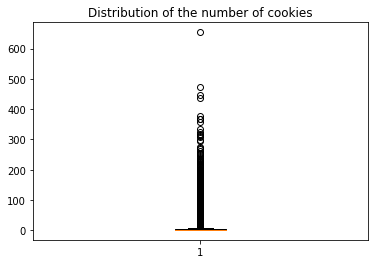

In [4]:
plt.boxplot(df['num_cookies'])
plt.title('Distribution of the number of cookies')

In [5]:
df.tail()

,hhid,reached_flg,num_inds,children_ind,hh_income_ind,age_ind,home_value_ind,state,num_cookies,num_days_online,num_events,brand_sales_q5,brand_sales_q4,brand_sales_q3,brand_sales_q2,brand_sales_q1,brand_sales_post
1048570,1048571,0,7,0,0 to 50,65+,noValue,CA,1,21,173,0.0,0.0,0.000000,0.0,0.000000,0.000000
1048571,1048572,1,6,0,51 to 100,65+,201 to 500,CA,2,10,41,0.0,0.0,0.000000,0.0,0.000000,0.000000
1048572,1048573,1,7,1,0 to 50,noValue,noValue,AZ,1,12,26,0.0,0.0,0.000000,0.0,0.078941,0.608896
1048573,1048574,0,6,0,0 to 50,65+,0 to 100,MS,1,1,2,0.0,0.0,0.000000,0.0,0.000000,0.000000
1048574,1048575,0,15,1,0 to 50,noValue,101 to 200,CT,2,17,33,0.0,0.0,0.294726,0.0,0.000000,-0.014736


Total dataset is 1,048,575

In [6]:
df.dtypes

hhid                  int64
reached_flg           int64
num_inds              int64
children_ind         object
hh_income_ind        object
age_ind              object
home_value_ind       object
state                object
num_cookies           int64
num_days_online       int64
num_events            int64
brand_sales_q5      float64
brand_sales_q4      float64
brand_sales_q3      float64
brand_sales_q2      float64
brand_sales_q1      float64
brand_sales_post    float64
dtype: object

In [7]:
df.isnull().sum()

hhid                0
reached_flg         0
num_inds            0
children_ind        0
hh_income_ind       0
age_ind             0
home_value_ind      0
state               0
num_cookies         0
num_days_online     0
num_events          0
brand_sales_q5      0
brand_sales_q4      0
brand_sales_q3      0
brand_sales_q2      0
brand_sales_q1      0
brand_sales_post    0
dtype: int64

In [8]:
(df['age_ind']=='noValue').sum()

307790

In [9]:
df['brand_sales_pre'] = (df['brand_sales_q5'] + df['brand_sales_q4'] + df['brand_sales_q3'] + df['brand_sales_q2'] + df['brand_sales_q1'])/5
df['brand_sales_pre'] 

0          0.000000
1          0.000000
2          0.000000
3          0.000000
4          0.000000
             ...   
1048570    0.000000
1048571    0.000000
1048572    0.015788
1048573    0.000000
1048574    0.058945
Name: brand_sales_pre, Length: 1048575, dtype: float64

{'whiskers': [<matplotlib.lines.Line2D at 0x18b00c31548>,
 'caps': [<matplotlib.lines.Line2D at 0x18b00c31e88>,
 'boxes': [<matplotlib.lines.Line2D at 0x18b007c35c8>,
 'medians': [<matplotlib.lines.Line2D at 0x18b00c36f88>,
 'fliers': [<matplotlib.lines.Line2D at 0x18b00c3af88>,
 'means': []}

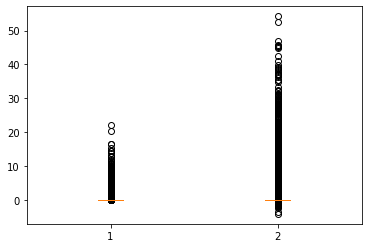

In [10]:
pre = df['brand_sales_pre']
post = df['brand_sales_post']
plt.boxplot([pre, post])
#plt.boxplot([,])

In [11]:
print(max(df['brand_sales_pre']))
print(min(df['brand_sales_pre']))
print(max(df['brand_sales_post']))
print(min(df['brand_sales_post']))

22.063996789999997
0.0
54.23462567
-4.098914117


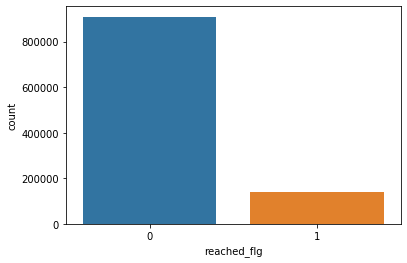

In [12]:
sns.countplot(x ='reached_flg', data = df)
# % ratio is 87:13 
## As shown below, the data is unbalanced

In [13]:
df

,hhid,reached_flg,num_inds,children_ind,hh_income_ind,age_ind,home_value_ind,state,num_cookies,num_days_online,num_events,brand_sales_q5,brand_sales_q4,brand_sales_q3,brand_sales_q2,brand_sales_q1,brand_sales_post,brand_sales_pre
0,1,0,5,2+,51 to 100,50-59,0 to 100,WV,6,37,247,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000
1,2,0,13,2+,51 to 100,50-59,noValue,MD,3,28,147,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000
2,3,0,17,0,51 to 100,60-64,noValue,MS,3,13,64,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000
3,4,0,12,2+,51 to 100,noValue,noValue,LA,4,8,28,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000
4,5,1,10,2+,51 to 100,20-29,101 to 200,CA,3,12,22,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048570,1048571,0,7,0,0 to 50,65+,noValue,CA,1,21,173,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000
1048571,1048572,1,6,0,51 to 100,65+,201 to 500,CA,2,10,41,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000
1048572,1048573,1,7,1,0 to 50,noValue,noValue,AZ,1,12,26,0.0,0.0,0.000000,0.0,0.078941,0.608896,0.015788
1048573,1048574,0,6,0,0 to 50,65+,0 to 100,MS,1,1,2,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000


In [14]:
df.nunique()

hhid                1048575
reached_flg               2
num_inds                 30
children_ind              3
hh_income_ind             5
age_ind                   8
home_value_ind            5
state                    54
num_cookies             219
num_days_online          46
num_events             1143
brand_sales_q5        59117
brand_sales_q4       114987
brand_sales_q3       167000
brand_sales_q2       114902
brand_sales_q1       167116
brand_sales_post     305824
brand_sales_pre      262636
dtype: int64

In [44]:
#looking at just the unreached 
df_0 = df[df['reached_flg'] == 0]
df_1 = df[df['reached_flg'] == 1]
print(df_0['brand_sales_pre'].mean())
print(df_0['brand_sales_post'].mean())
print('Now looking at the statistics of households who saw ads')
print(df_1['brand_sales_pre'].mean())
print(df_1['brand_sales_post'].mean())

0.08986938130410049
0.16800128674818987
Now looking at the statistics of households who saw ads
0.0930135645327325
0.17471810533240684


{'whiskers': [<matplotlib.lines.Line2D at 0x18b011d3ec8>,
 'caps': [<matplotlib.lines.Line2D at 0x18b011d7e08>,
 'boxes': [<matplotlib.lines.Line2D at 0x18b00f01b08>,
 'medians': [<matplotlib.lines.Line2D at 0x18b011ddd88>,
 'fliers': [<matplotlib.lines.Line2D at 0x18b011dde88>,
 'means': []}

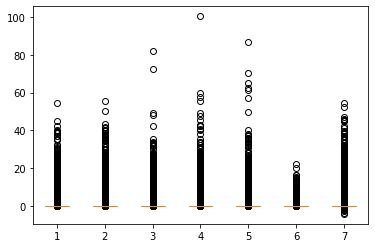

In [16]:
# boxplots to look at the differnt quarters pre-ad for total dataset
plt.boxplot([df.brand_sales_q1,df.brand_sales_q2,df.brand_sales_q3,df.brand_sales_q4,df.brand_sales_q5,df.brand_sales_pre,df.brand_sales_post])

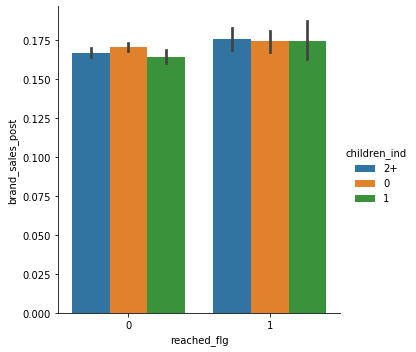

In [17]:
sns.catplot(x="reached_flg", y="brand_sales_post", hue="children_ind", kind="bar", data=df)

## The plot distribution for the 5 quarters before the test ad and post ad show no significant difference
 plots 1-5 represent the 5 quarters before the test ad, 
 plot 6 represnts the sum of the first 5 quarters before the ad
 plot 7 represents the sales count after the ad

{'whiskers': [<matplotlib.lines.Line2D at 0x18b0ba93808>,
 'caps': [<matplotlib.lines.Line2D at 0x18b0ba93f08>,
 'boxes': [<matplotlib.lines.Line2D at 0x18b4b64e208>,
 'medians': [<matplotlib.lines.Line2D at 0x18b0ba97fc8>,
 'fliers': [<matplotlib.lines.Line2D at 0x18b0ba9ce48>,
 'means': []}

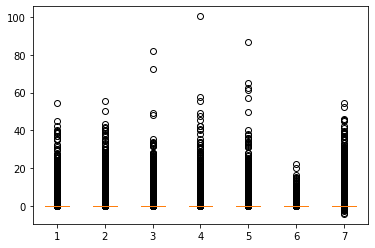

In [18]:
#looking at the unreached ad folks
plt.boxplot([df_0.brand_sales_q1,df_0.brand_sales_q2,df_0.brand_sales_q3,df_0.brand_sales_q4,df_0.brand_sales_q5,df_0.brand_sales_pre,df_0.brand_sales_post])

{'whiskers': [<matplotlib.lines.Line2D at 0x18b0c05fd88>,
 'caps': [<matplotlib.lines.Line2D at 0x18b0c063d08>,
 'boxes': [<matplotlib.lines.Line2D at 0x18b0be9c488>,
 'medians': [<matplotlib.lines.Line2D at 0x18b0c069c88>,
 'fliers': [<matplotlib.lines.Line2D at 0x18b0c069d88>,
 'means': []}

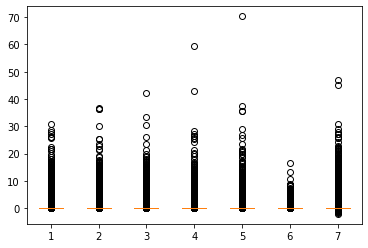

In [19]:
#looking at the reached ad folks
plt.boxplot([df_1.brand_sales_q1,df_1.brand_sales_q2,df_1.brand_sales_q3,df_1.brand_sales_q4,df_1.brand_sales_q5,df_1.brand_sales_pre,df_1.brand_sales_post])

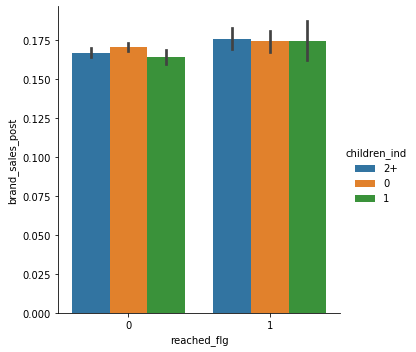

In [20]:
sns.catplot(x="reached_flg", y="brand_sales_post", hue="children_ind", kind="bar", data=df)

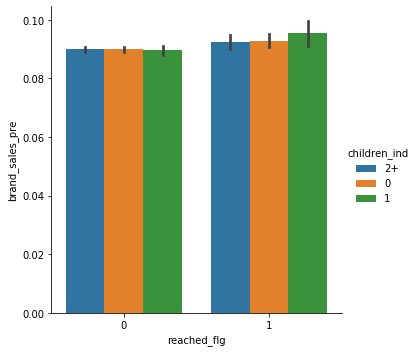

In [21]:
sns.catplot(x="reached_flg", y="brand_sales_pre", hue="children_ind", kind="bar", data=df)

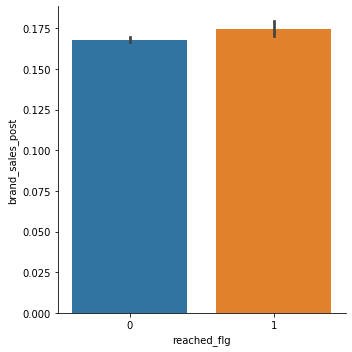

In [22]:
sns.catplot(x="reached_flg", y="brand_sales_post", kind="bar", data=df)

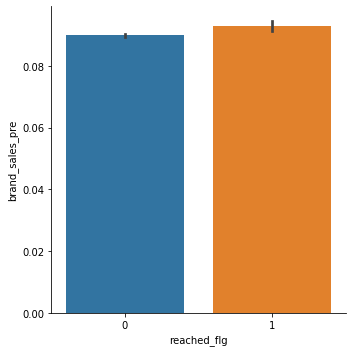

In [23]:
sns.catplot(x="reached_flg", y="brand_sales_pre", kind="bar", data=df)

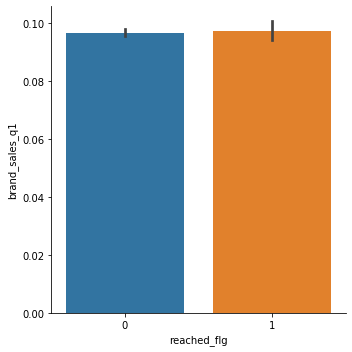

In [24]:
sns.catplot(x="reached_flg", y="brand_sales_q1", kind="bar", data=df)

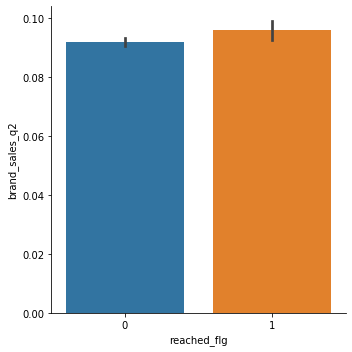

In [25]:
sns.catplot(x="reached_flg", y="brand_sales_q2", kind="bar", data=df)

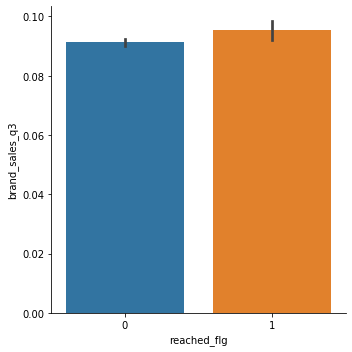

In [26]:
sns.catplot(x="reached_flg", y="brand_sales_q3", kind="bar", data=df)

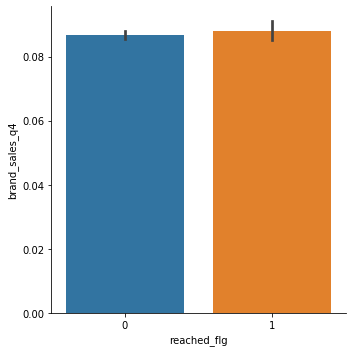

In [27]:
sns.catplot(x="reached_flg", y="brand_sales_q4", kind="bar", data=df)

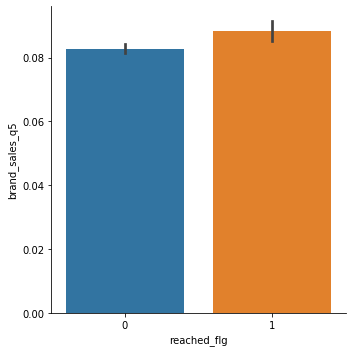

In [28]:
sns.catplot(x="reached_flg", y="brand_sales_q5", kind="bar", data=df)

In [29]:
import statsmodels.api as sm
from scipy.stats import norm

## Datascience Package

In [30]:
pip install datascience

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'C:\Users\judah\Anaconda3\python.exe -m pip install --upgrade pip' command.


In [31]:
from datascience import *

In [36]:
print('help')

help


## Back to Basics

In [40]:
df['sales_lift'] = df['brand_sales_post'] - df['brand_sales_pre']

In [41]:
df['sales_lift']

0          0.000000
1          0.000000
2          0.000000
3          0.000000
4          0.000000
             ...   
1048570    0.000000
1048571    0.000000
1048572    0.593107
1048573    0.000000
1048574   -0.073682
Name: sales_lift, Length: 1048575, dtype: float64

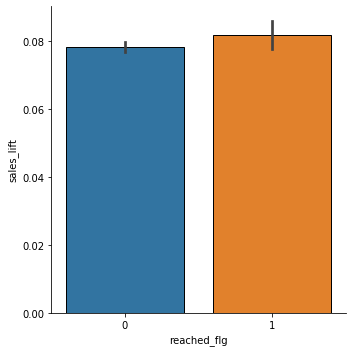

In [42]:
sns.catplot(x="reached_flg", y="sales_lift", kind="bar", data=df)

## T-Test

In [32]:
alpha = 0.05
first_test = df_0['brand_sales_post']
second_test = df_1['brand_sales_post']

from scipy import stats

t_value,p_value=stats.ttest_rel(first_test,second_test)

one_tailed_p_value=float("{:.6f}".format(p_value/2)) 

print('Test statistic is %f'%float("{:.6f}".format(t_value)))

print('p-value for one_tailed_test is %f'%one_tailed_p_value)

alpha = 0.05

if one_tailed_p_value<=alpha:

    print('Conclusion','n','Since p-value(=%f)'%one_tailed_p_value,'<','alpha(=%.2f)'%alpha,'''We reject the null hypothesis H0. 

So we conclude that the students have benefited by the tuition class. i.e., d = 0 at %.2f level of significance.'''%alpha)

else:

    print('Conclusion','n','Since p-value(=%f)'%one_tailed_p_value,'>','alpha(=%.2f)'%alpha,'''We do not reject the null hypothesis H0. 

So we conclude that the students have not benefited by the tuition class. i.e., d = 0 at %.2f level of significance.'''%alpha)

In [34]:
#t_value,p_value=stats.ttest_ind(first_test,second_test)
from scipy import stats
stats.ttest_ind(first_test,second_test)

## reject the null hypothesis, accept alternative

Ttest_indResult(statistic=-2.7388024524103516, pvalue=0.006166445396585985)

In [35]:
alpha = 0.05
first_test = df_0['brand_sales_pre']
second_test = df_1['brand_sales_pre']
stats.ttest_ind(first_test,second_test)

Ttest_indResult(statistic=-3.686231681916889, pvalue=0.0002276106272289624)

In [45]:
## T-test on sales lift. This assumes equal variance

alpha = 0.05
first_test = df_0['sales_lift']
second_test = df_1['sales_lift']
stats.ttest_ind(first_test,second_test)

# fail to reject the null. i.e. both means are equal

Ttest_indResult(statistic=-1.5230571335199528, pvalue=0.1277447136801407)

In [81]:
## T-test on sales lift. This assumes unequal variance

alpha = 0.05
first_test = df_0['sales_lift']
second_test = df_1['sales_lift']
stats.ttest_ind(first_test, second_test, equal_var=False)

# fail to reject the null. i.e. both means are equal

Ttest_indResult(statistic=-1.5306009606750162, pvalue=0.12586974833557366)

## Further exploration

In [ ]:
children_ind         object
hh_income_ind        object
age_ind              object
home_value_ind       object
state                object

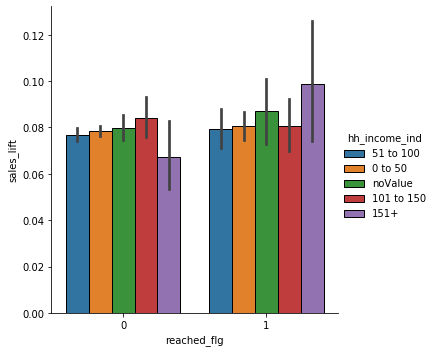

In [46]:
sns.catplot(x="reached_flg", y="sales_lift", hue="hh_income_ind", kind="bar", data=df)

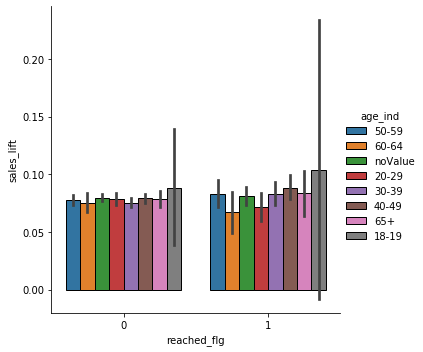

In [47]:
sns.catplot(x="reached_flg", y="sales_lift", hue="age_ind", kind="bar", data=df)

In [ ]:
## maybe look into a scatter plot or the distribution of sales lift for the yyounger population

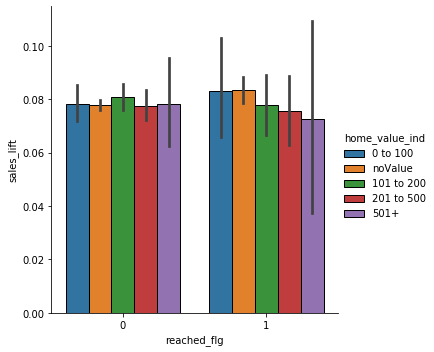

In [48]:
sns.catplot(x="reached_flg", y="sales_lift", hue="home_value_ind", kind="bar", data=df)

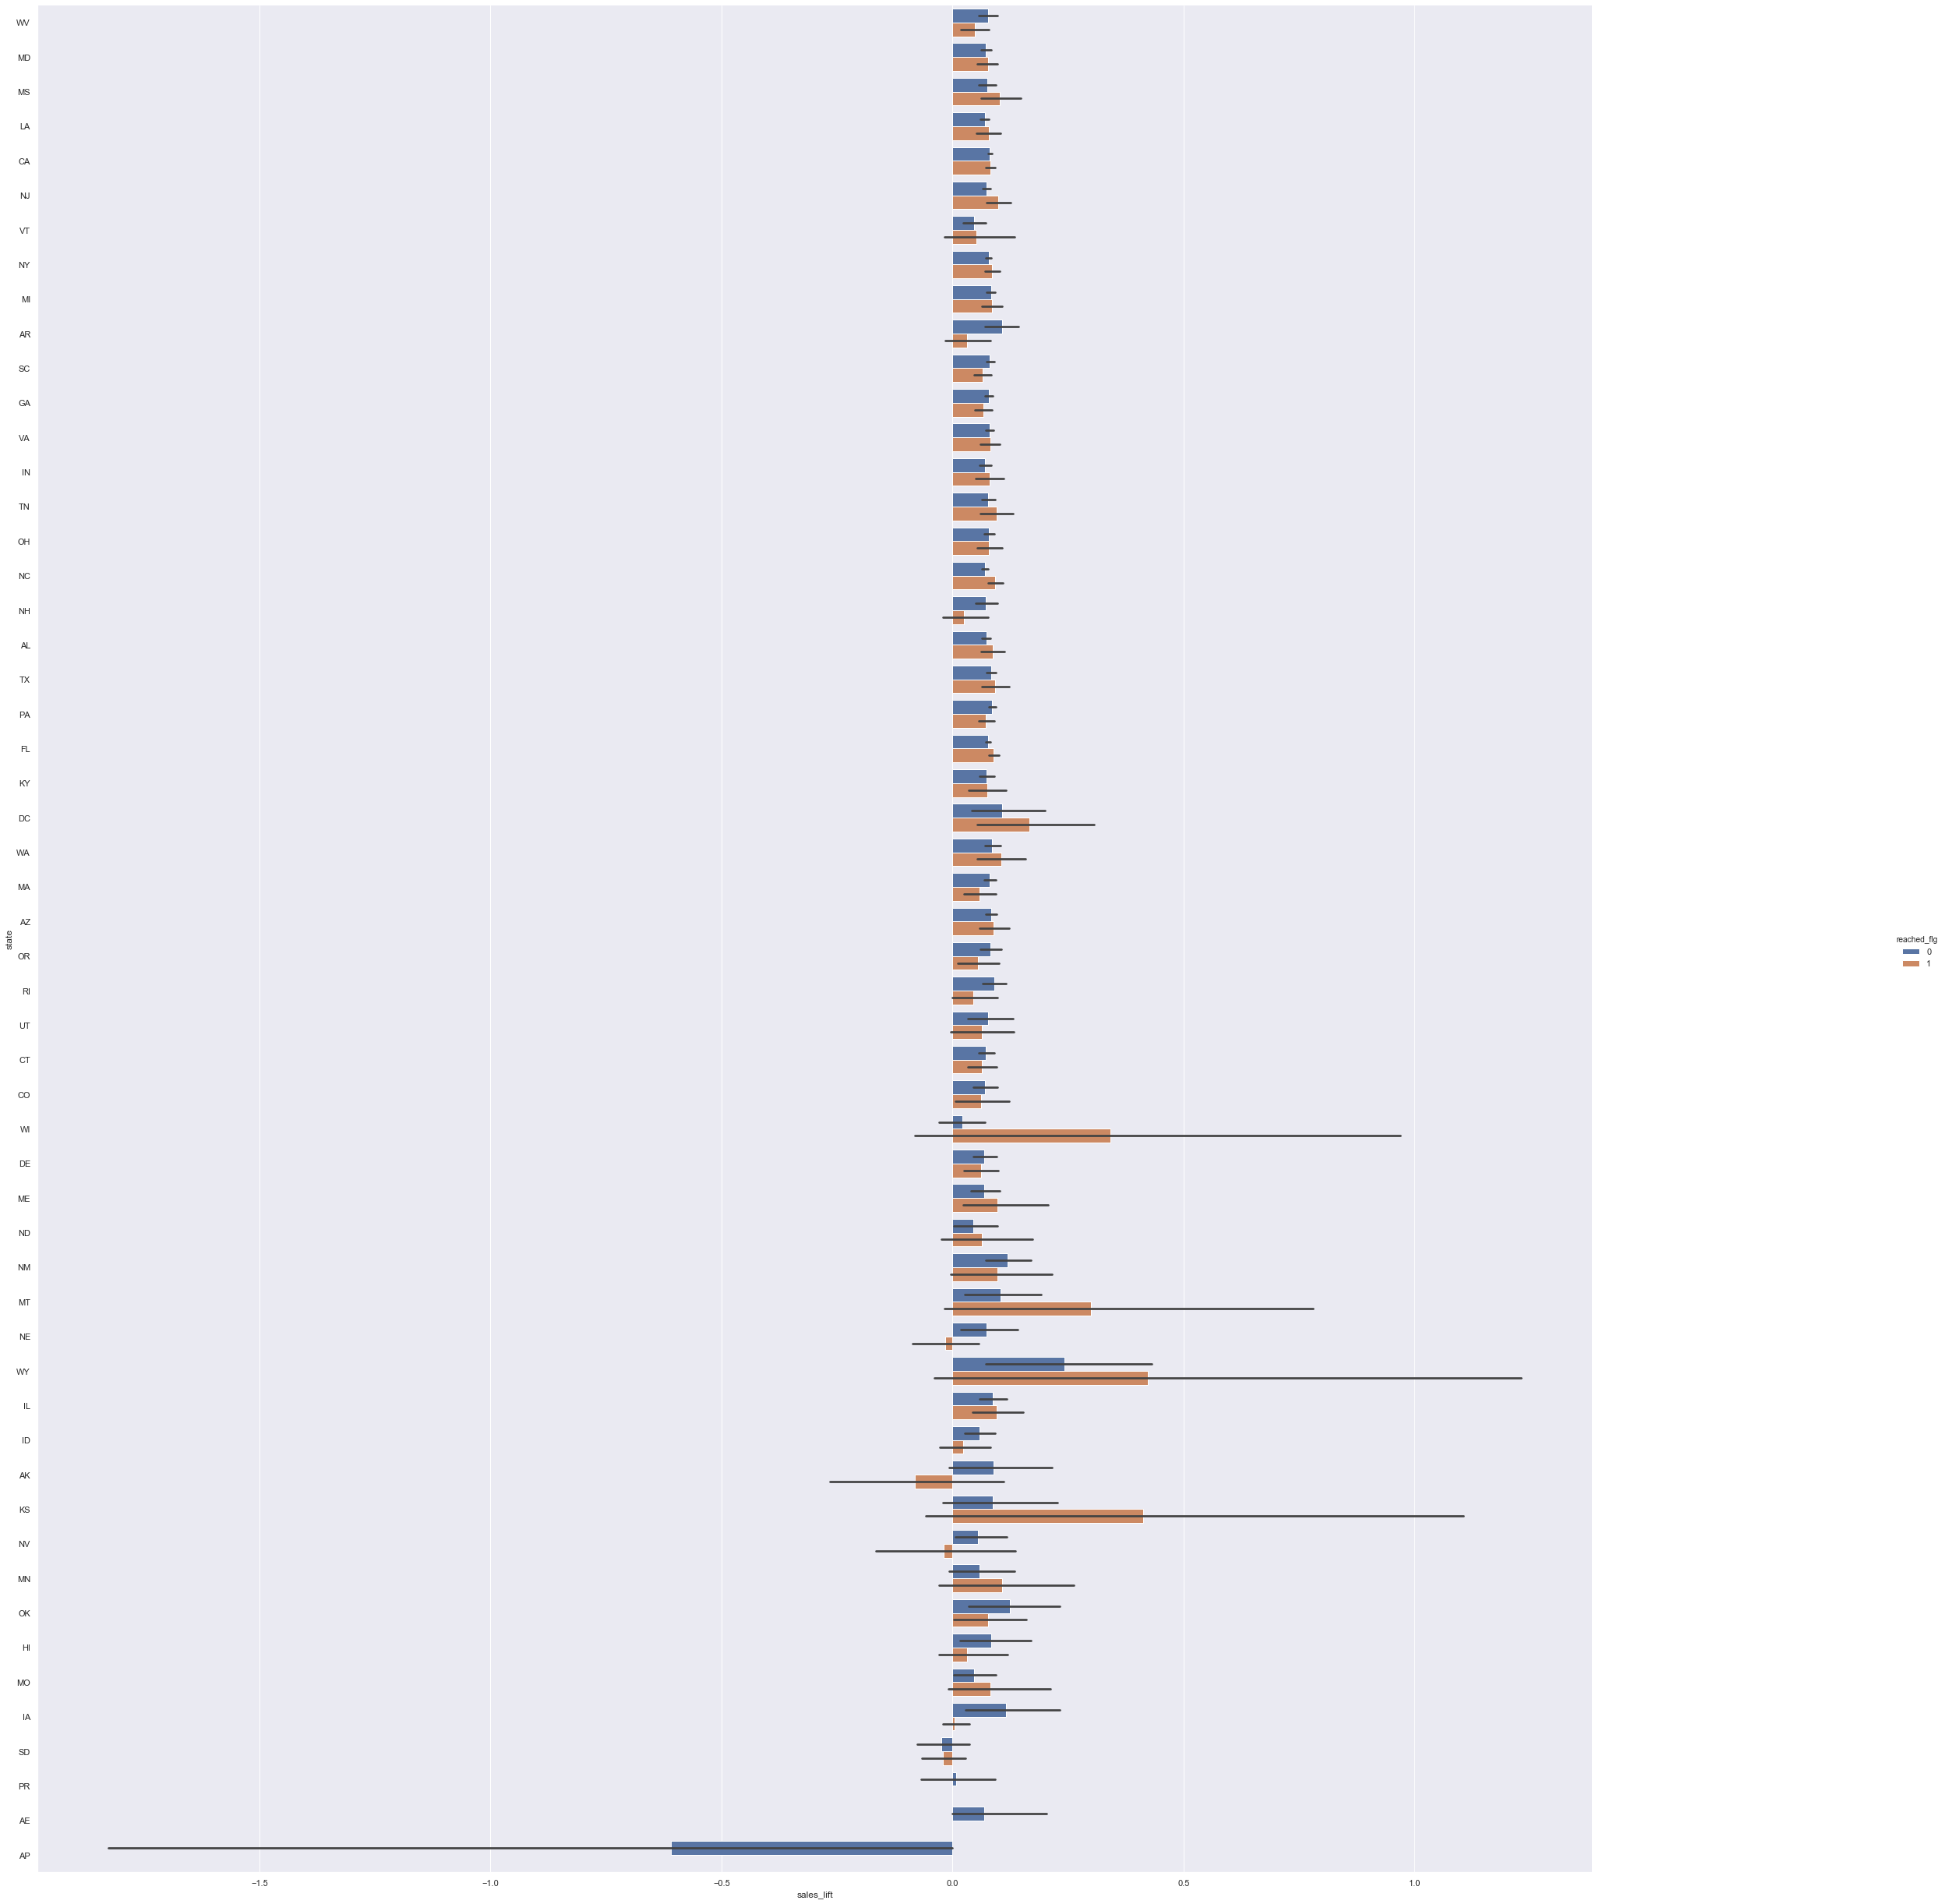

In [56]:
#sns.set(rc={"figure.figsize":(1000, 1000)}) #width=8, height=4
a=sns.catplot(y="state", x="sales_lift", hue="reached_flg", kind="bar", data=df)
a.fig.set_size_inches(40,40)


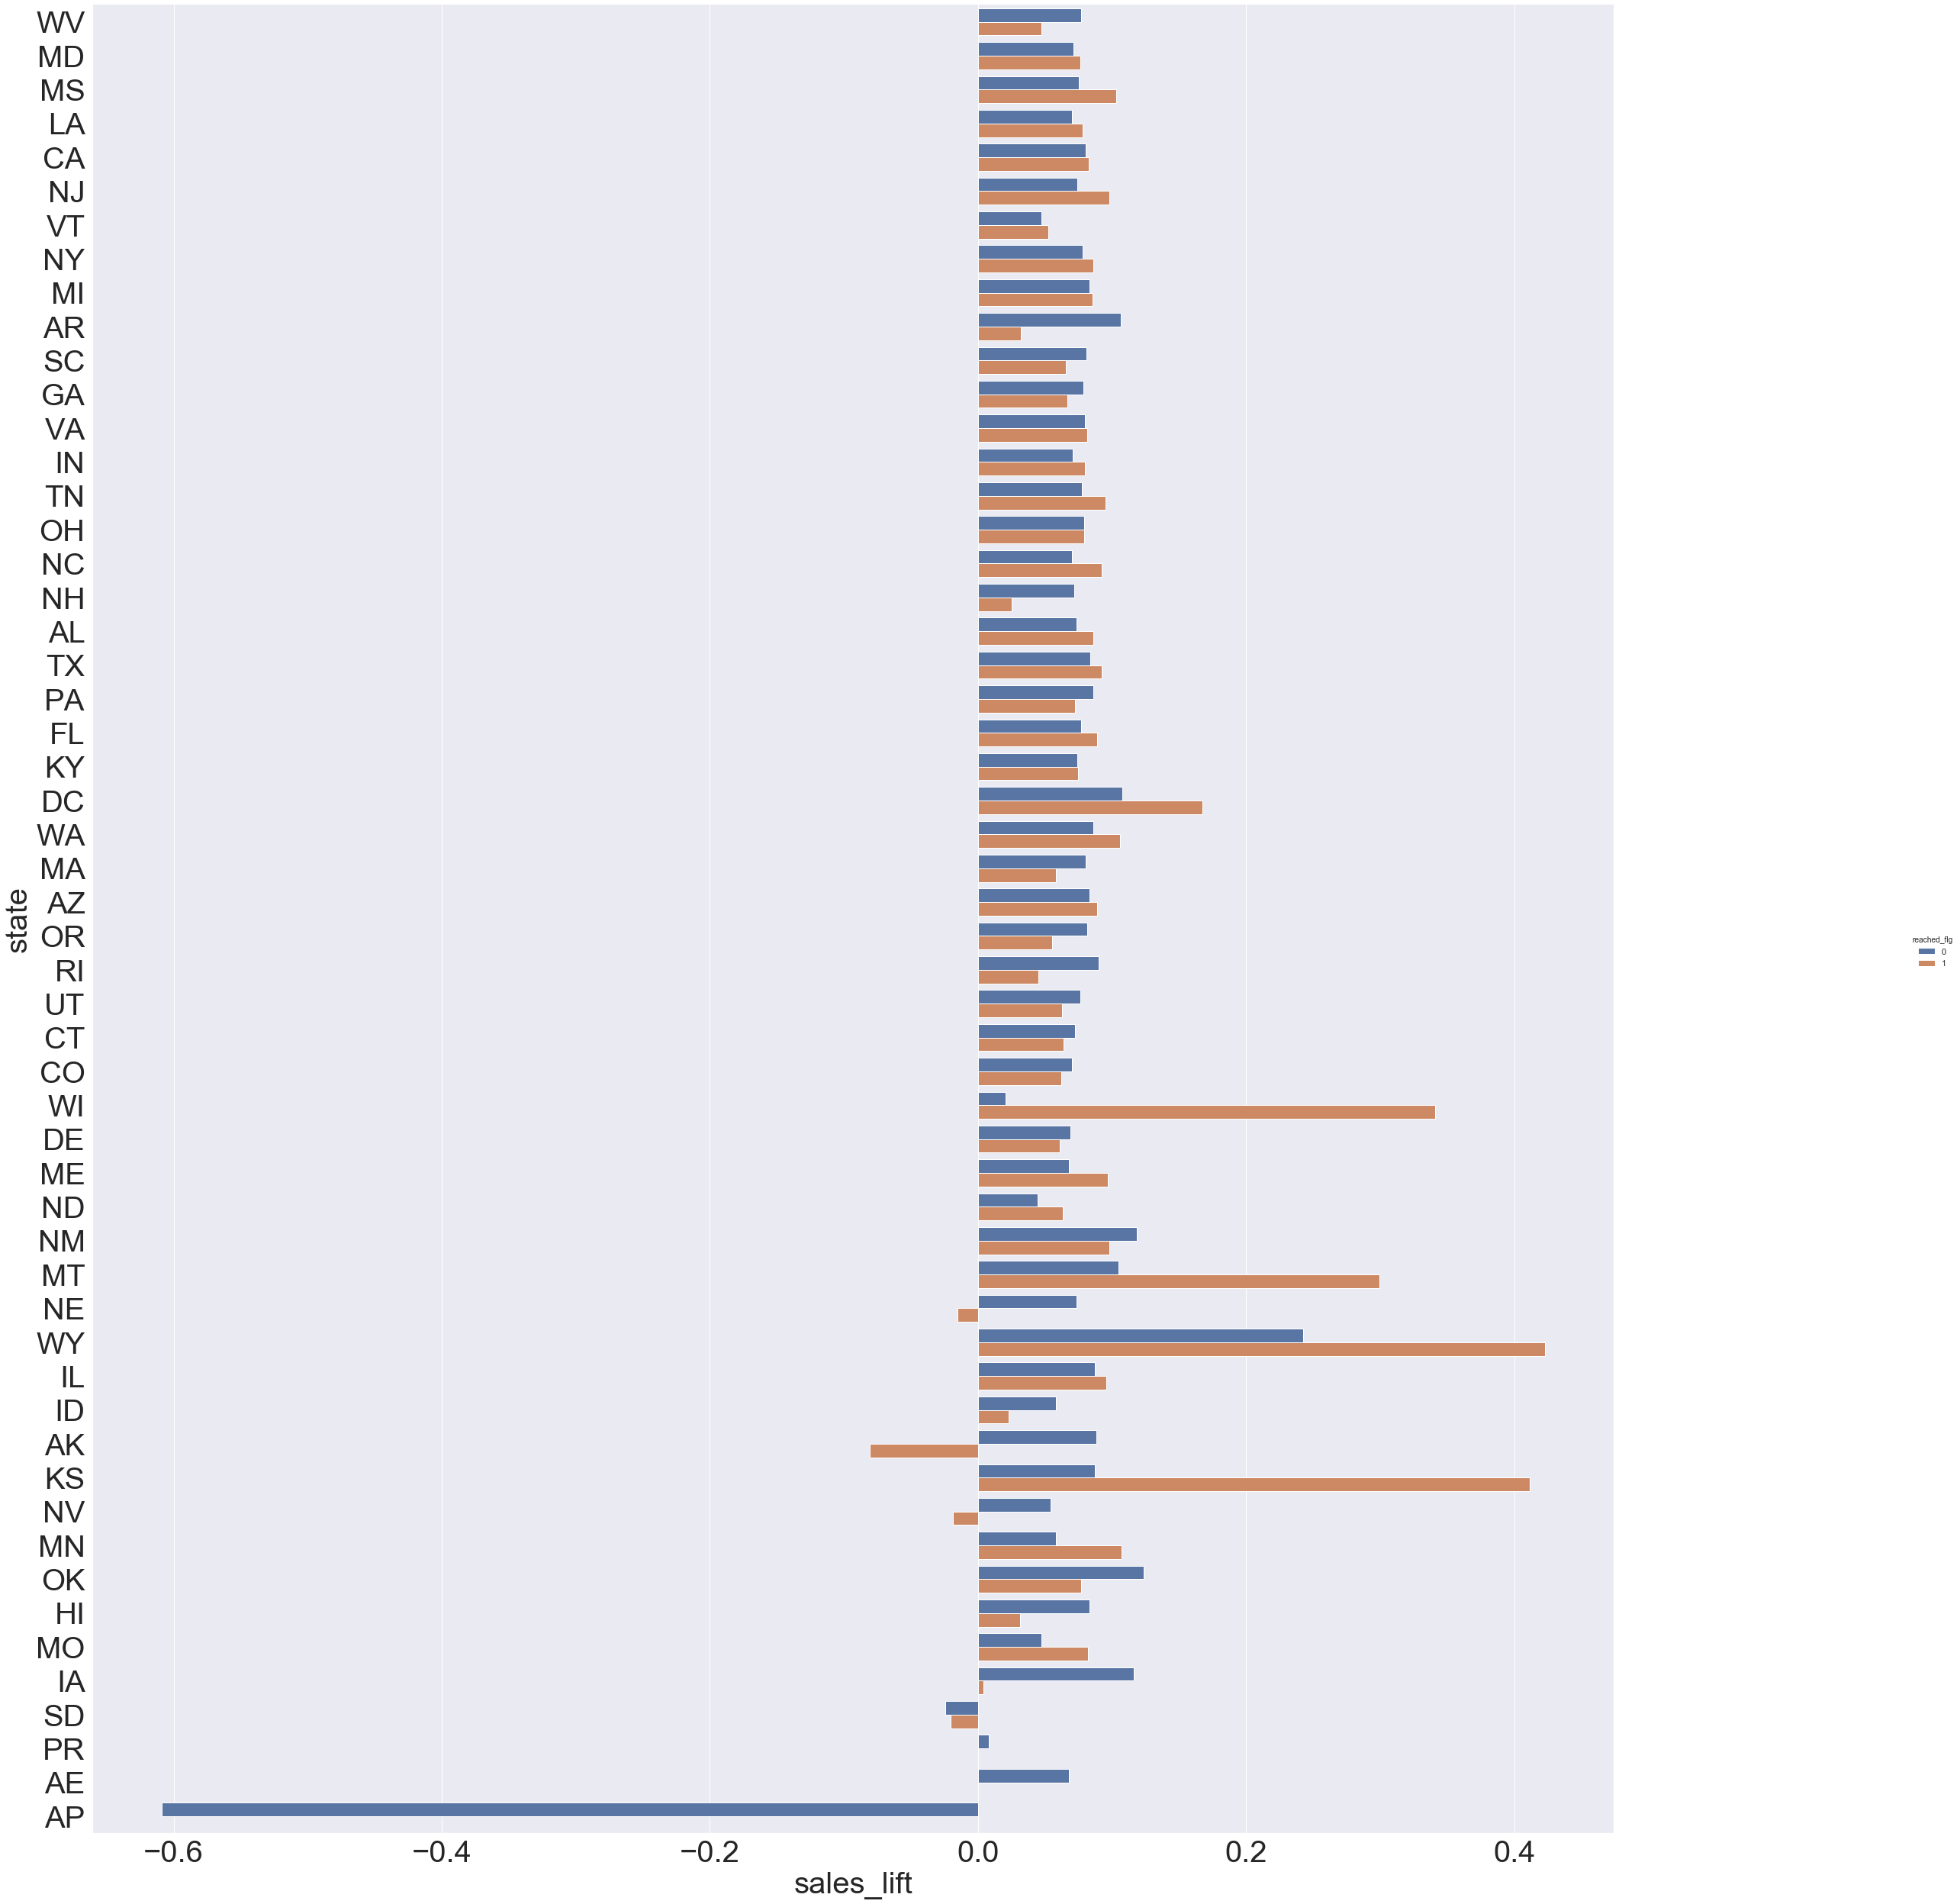

In [61]:
#sns.set(rc={"figure.figsize":(1000, 1000)}) #width=8, height=4
a=sns.catplot(y="state", x="sales_lift", hue="reached_flg", kind="bar", data=df, ci = None)
a.fig.set_size_inches(40,40)
a.set_xticklabels(fontsize = 40)
a.set_xlabels(fontsize = 40)
a.set_yticklabels(fontsize = 40)
a.set_ylabels(fontsize = 40)


# Try to look at the chart above w.r.t to age distribution

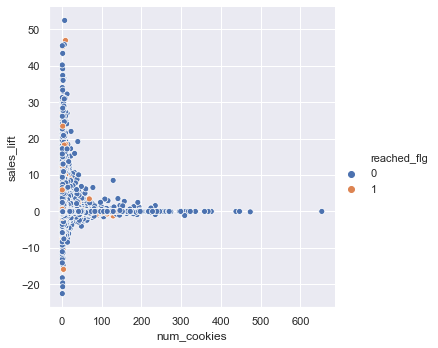

In [65]:
sns.relplot(x="num_cookies", y="sales_lift", hue="reached_flg", data=df);

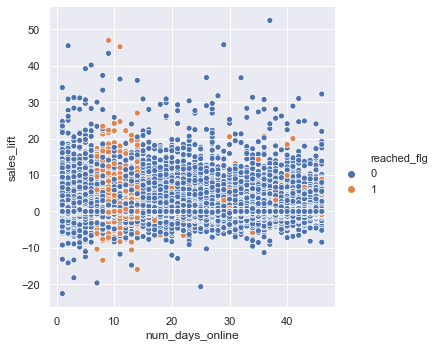

In [66]:
sns.relplot(x="num_days_online", y="sales_lift", hue="reached_flg", data=df)

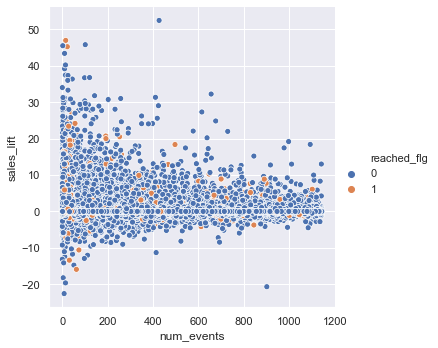

In [67]:
sns.relplot(x="num_events", y="sales_lift", hue="reached_flg", data=df)

## Density Plots

In [68]:
# Density Plot and Histogram of all arrival delays
sns.distplot(df['sales_lift'], hist=True, kde=True, 
              color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})

Error in callback <function install_repl_displayhook.<locals>.post_execute at 0x0000018B7CEA83A8> (for post_execute):


ValueError: Image size of 72000x72000 pixels is too large. It must be less than 2^16 in each direction.

ValueError: Image size of 72000x72000 pixels is too large. It must be less than 2^16 in each direction.

<Figure size 72000x72000 with 1 Axes>

In [71]:
plt.hist(df_1['sales_lift'], color = 'blue', edgecolor = 'black')
         

(array([4.00000e+00, 8.40000e+01, 1.37781e+05, 1.51600e+03, 9.50000e+01,
        3.10000e+01, 8.00000e+00, 0.00000e+00, 0.00000e+00, 2.00000e+00]),
 array([-15.91009566,  -9.62382478,  -3.3375539 ,   2.94871697,
          9.23498785,  15.52125873,  21.8075296 ,  28.09380048,
         34.38007136,  40.66634223,  46.95261311]),
 <a list of 10 Patch objects>)

Error in callback <function install_repl_displayhook.<locals>.post_execute at 0x0000018B7CEA83A8> (for post_execute):


ValueError: Image size of 72000x72000 pixels is too large. It must be less than 2^16 in each direction.

ValueError: Image size of 72000x72000 pixels is too large. It must be less than 2^16 in each direction.

<Figure size 72000x72000 with 1 Axes>

## Standard Deviation

In [76]:
import statistics
from statistics import stdev
#print(df_0['sales_lift'].stdev())
#print(df_1['sales_lift'].stdev())

print("The Standard Deviation of Sample4 is % s" %(stdev(df_0['sales_lift'])))
print("The Standard Deviation of Sample4 is % s" %(stdev(df_1['sales_lift'])))


The Standard Deviation of Sample4 is 0.8165337862782736
The Standard Deviation of Sample4 is 0.8110549275933672


## Calculate F-test for samples

In [79]:
import scipy
def f_test(x, y):
    x = np.array(x)
    y = np.array(y)
    f = np.var(x, ddof=1)/np.var(y, ddof=1) #calculate F test statistic 
    dfn = x.size-1 #define degrees of freedom numerator 
    dfd = y.size-1 #define degrees of freedom denominator 
    p = 1-scipy.stats.f.cdf(f, dfn, dfd) #find p-value of F test statistic 
    return f, p

In [80]:
x = df_0['sales_lift']   
y = df_1['sales_lift'] 
f_test(x, y)

(1.013556083466121, 0.0004750412000132931)

In [ ]:
# This means that i should reject the null-hyppthesis stating that the variances are equal. 
# i.e. the population variances are not equal

## Categorical Variables

In [82]:
df_age = df[df['age_ind'] == '18-19']
df_age

,hhid,reached_flg,num_inds,children_ind,hh_income_ind,age_ind,home_value_ind,state,num_cookies,num_days_online,num_events,brand_sales_q5,brand_sales_q4,brand_sales_q3,brand_sales_q2,brand_sales_q1,brand_sales_post,brand_sales_pre,sales_lift
274,275,0,16,0,0 to 50,18-19,noValue,CT,1,2,3,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1322,1323,0,11,1,101 to 150,18-19,noValue,MA,3,20,68,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2171,2172,0,12,0,51 to 100,18-19,noValue,FL,2,9,13,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4031,4032,0,13,2+,0 to 50,18-19,noValue,FL,3,20,61,1.642891,0.082145,0.008214,0.164289,0.024643,1.844146,0.384436,1.459710
5027,5028,0,6,2+,noValue,18-19,0 to 100,AR,4,28,176,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1045569,1045570,0,5,0,0 to 50,18-19,201 to 500,NJ,7,10,18,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1046174,1046175,0,9,2+,0 to 50,18-19,501+,NY,3,5,10,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1046764,1046765,0,10,2+,0 to 50,18-19,101 to 200,MI,4,24,93,0.000000,0.000000,0.000000,0.508083,0.076213,0.040647,0.116859,-0.076213
1047112,1047113,0,9,0,0 to 50,18-19,101 to 200,FL,3,15,55,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [83]:
df_age[df_age.reached_flg == 0]
# contains 1123 unreached and 151 reached

,hhid,reached_flg,num_inds,children_ind,hh_income_ind,age_ind,home_value_ind,state,num_cookies,num_days_online,num_events,brand_sales_q5,brand_sales_q4,brand_sales_q3,brand_sales_q2,brand_sales_q1,brand_sales_post,brand_sales_pre,sales_lift
274,275,0,16,0,0 to 50,18-19,noValue,CT,1,2,3,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1322,1323,0,11,1,101 to 150,18-19,noValue,MA,3,20,68,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2171,2172,0,12,0,51 to 100,18-19,noValue,FL,2,9,13,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4031,4032,0,13,2+,0 to 50,18-19,noValue,FL,3,20,61,1.642891,0.082145,0.008214,0.164289,0.024643,1.844146,0.384436,1.459710
5027,5028,0,6,2+,noValue,18-19,0 to 100,AR,4,28,176,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1045525,1045526,0,13,1,51 to 100,18-19,noValue,FL,1,1,1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1045569,1045570,0,5,0,0 to 50,18-19,201 to 500,NJ,7,10,18,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1046174,1046175,0,9,2+,0 to 50,18-19,501+,NY,3,5,10,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1046764,1046765,0,10,2+,0 to 50,18-19,101 to 200,MI,4,24,93,0.000000,0.000000,0.000000,0.508083,0.076213,0.040647,0.116859,-0.076213


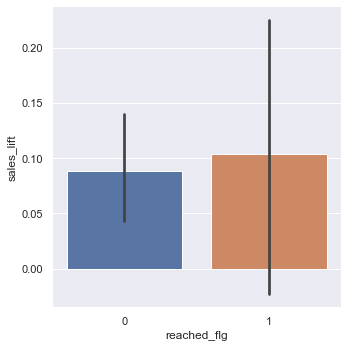

In [84]:
sns.catplot(x="reached_flg", y="sales_lift", kind="bar", data=df_age)

In [ ]:
def f_test(x, y):
    x = np.array(x)
    y = np.array(y)
    f = np.var(x, ddof=1)/np.var(y, ddof=1) #calculate F test statistic 
    dfn = x.size-1 #define degrees of freedom numerator 
    dfd = y.size-1 #define degrees of freedom denominator 
    p = 1-scipy.stats.f.cdf(f, dfn, dfd) #find p-value of F test statistic 
    return f, p

In [86]:
df_age[df_age.reached_flg == 0]


x = df_age[df_age.reached_flg == 0]['sales_lift']   
y = df_age[df_age.reached_flg == 1]['sales_lift']   
f_test(x, y)

(1.2461720788466348, 0.04380746379610456)

In [87]:
## T-test on sales lift. This assumes unequal variance

alpha = 0.05
first_test = df_age[df_age.reached_flg == 0]['sales_lift']  
second_test = df_age[df_age.reached_flg == 1]['sales_lift']
stats.ttest_ind(first_test, second_test, equal_var=False)

# fail to reject the null. i.e. both means are equal

Ttest_indResult(statistic=-0.2404782931362638, pvalue=0.8102013193227268)

## Categorical Variable: Household Income indicator

In [88]:
def household_cat(x):
    df_hh = df[df['hh_income_ind'] == x]
    x = df_hh[df_hh.reached_flg == 0]['sales_lift']   
    y = df_hh[df_hh.reached_flg == 1]['sales_lift']   
    f_test(x, y)
    
    
    return print(f_test(x, y))

In [90]:
household_cat('151+')
# equal variance

(0.6154697981541912, 1.0)


In [98]:
alpha = 0.05
df_hh = df[df['hh_income_ind']=='151+']
first_test = df_hh[df_hh.reached_flg == 0]['sales_lift']  
second_test = df_hh[df_hh.reached_flg == 1]['sales_lift']
stats.ttest_ind(first_test, second_test, equal_var=True)

## Thus is the case where household income is 151+ we reject the null hypothesis that the means are equal. rather we say 
## that households with higher income saw an increase in the sales

Ttest_indResult(statistic=-2.258766746407919, pvalue=0.023913371262345058)

In [92]:
household_cat('101 to 150')
#unequal variance

(1.2098751172307676, 1.1102230246251565e-16)


In [102]:
alpha = 0.05
df_hh = df[df['hh_income_ind']=='101 to 150']
first_test = df_hh[df_hh.reached_flg == 0]['sales_lift']  
second_test = df_hh[df_hh.reached_flg == 1]['sales_lift']
stats.ttest_ind(first_test, second_test, equal_var=False)


## In this case, accept the null hypothesis, the means are equal

Ttest_indResult(statistic=0.48224270964247745, pvalue=0.6296359568482113)

In [93]:
household_cat('51 to 100')

(0.8736185935702497, 1.0)


In [103]:
alpha = 0.05
df_hh = df[df['hh_income_ind']=='51 to 100']
first_test = df_hh[df_hh.reached_flg == 0]['sales_lift']  
second_test = df_hh[df_hh.reached_flg == 1]['sales_lift']
stats.ttest_ind(first_test, second_test, equal_var=True)

## In this case, accept the null hypothesis, the means are equal

Ttest_indResult(statistic=-0.6252511576313081, pvalue=0.5318066679670829)

In [94]:
household_cat('0 to 50')

(1.086421521297107, 1.1102230246251565e-16)


In [104]:
alpha = 0.05
df_hh = df[df['hh_income_ind']=='0 to 50']
first_test = df_hh[df_hh.reached_flg == 0]['sales_lift']  
second_test = df_hh[df_hh.reached_flg == 1]['sales_lift']
stats.ttest_ind(first_test, second_test, equal_var=False)

## In this case, accept the null hypothesis, the means are equal

Ttest_indResult(statistic=-0.6983093753763135, pvalue=0.484985626742629)

In [95]:
household_cat('noValue')

(1.082532323045264, 9.685355850663768e-10)


In [105]:
alpha = 0.05
df_hh = df[df['hh_income_ind']=='noValue']
first_test = df_hh[df_hh.reached_flg == 0]['sales_lift']  
second_test = df_hh[df_hh.reached_flg == 1]['sales_lift']
stats.ttest_ind(first_test, second_test, equal_var=False)

## In this case, accept the null hypothesis, the means are equal

Ttest_indResult(statistic=-0.9951177588671133, pvalue=0.3196919740711618)

## Matrix Scatter Plot

In [109]:
df_num = df[['num_inds','num_cookies','num_days_online','num_events','brand_sales_q5','brand_sales_q4','brand_sales_q3',
            'brand_sales_q2','brand_sales_q1','brand_sales_post','brand_sales_pre','sales_lift', 'reached_flg']]

df_num.head()


,num_inds,num_cookies,num_days_online,num_events,brand_sales_q5,brand_sales_q4,brand_sales_q3,brand_sales_q2,brand_sales_q1,brand_sales_post,brand_sales_pre,sales_lift,reached_flg
0,5,6,37,247,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1,13,3,28,147,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2,17,3,13,64,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
3,12,4,8,28,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
4,10,3,12,22,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1


C:\Users\judah\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\judah\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


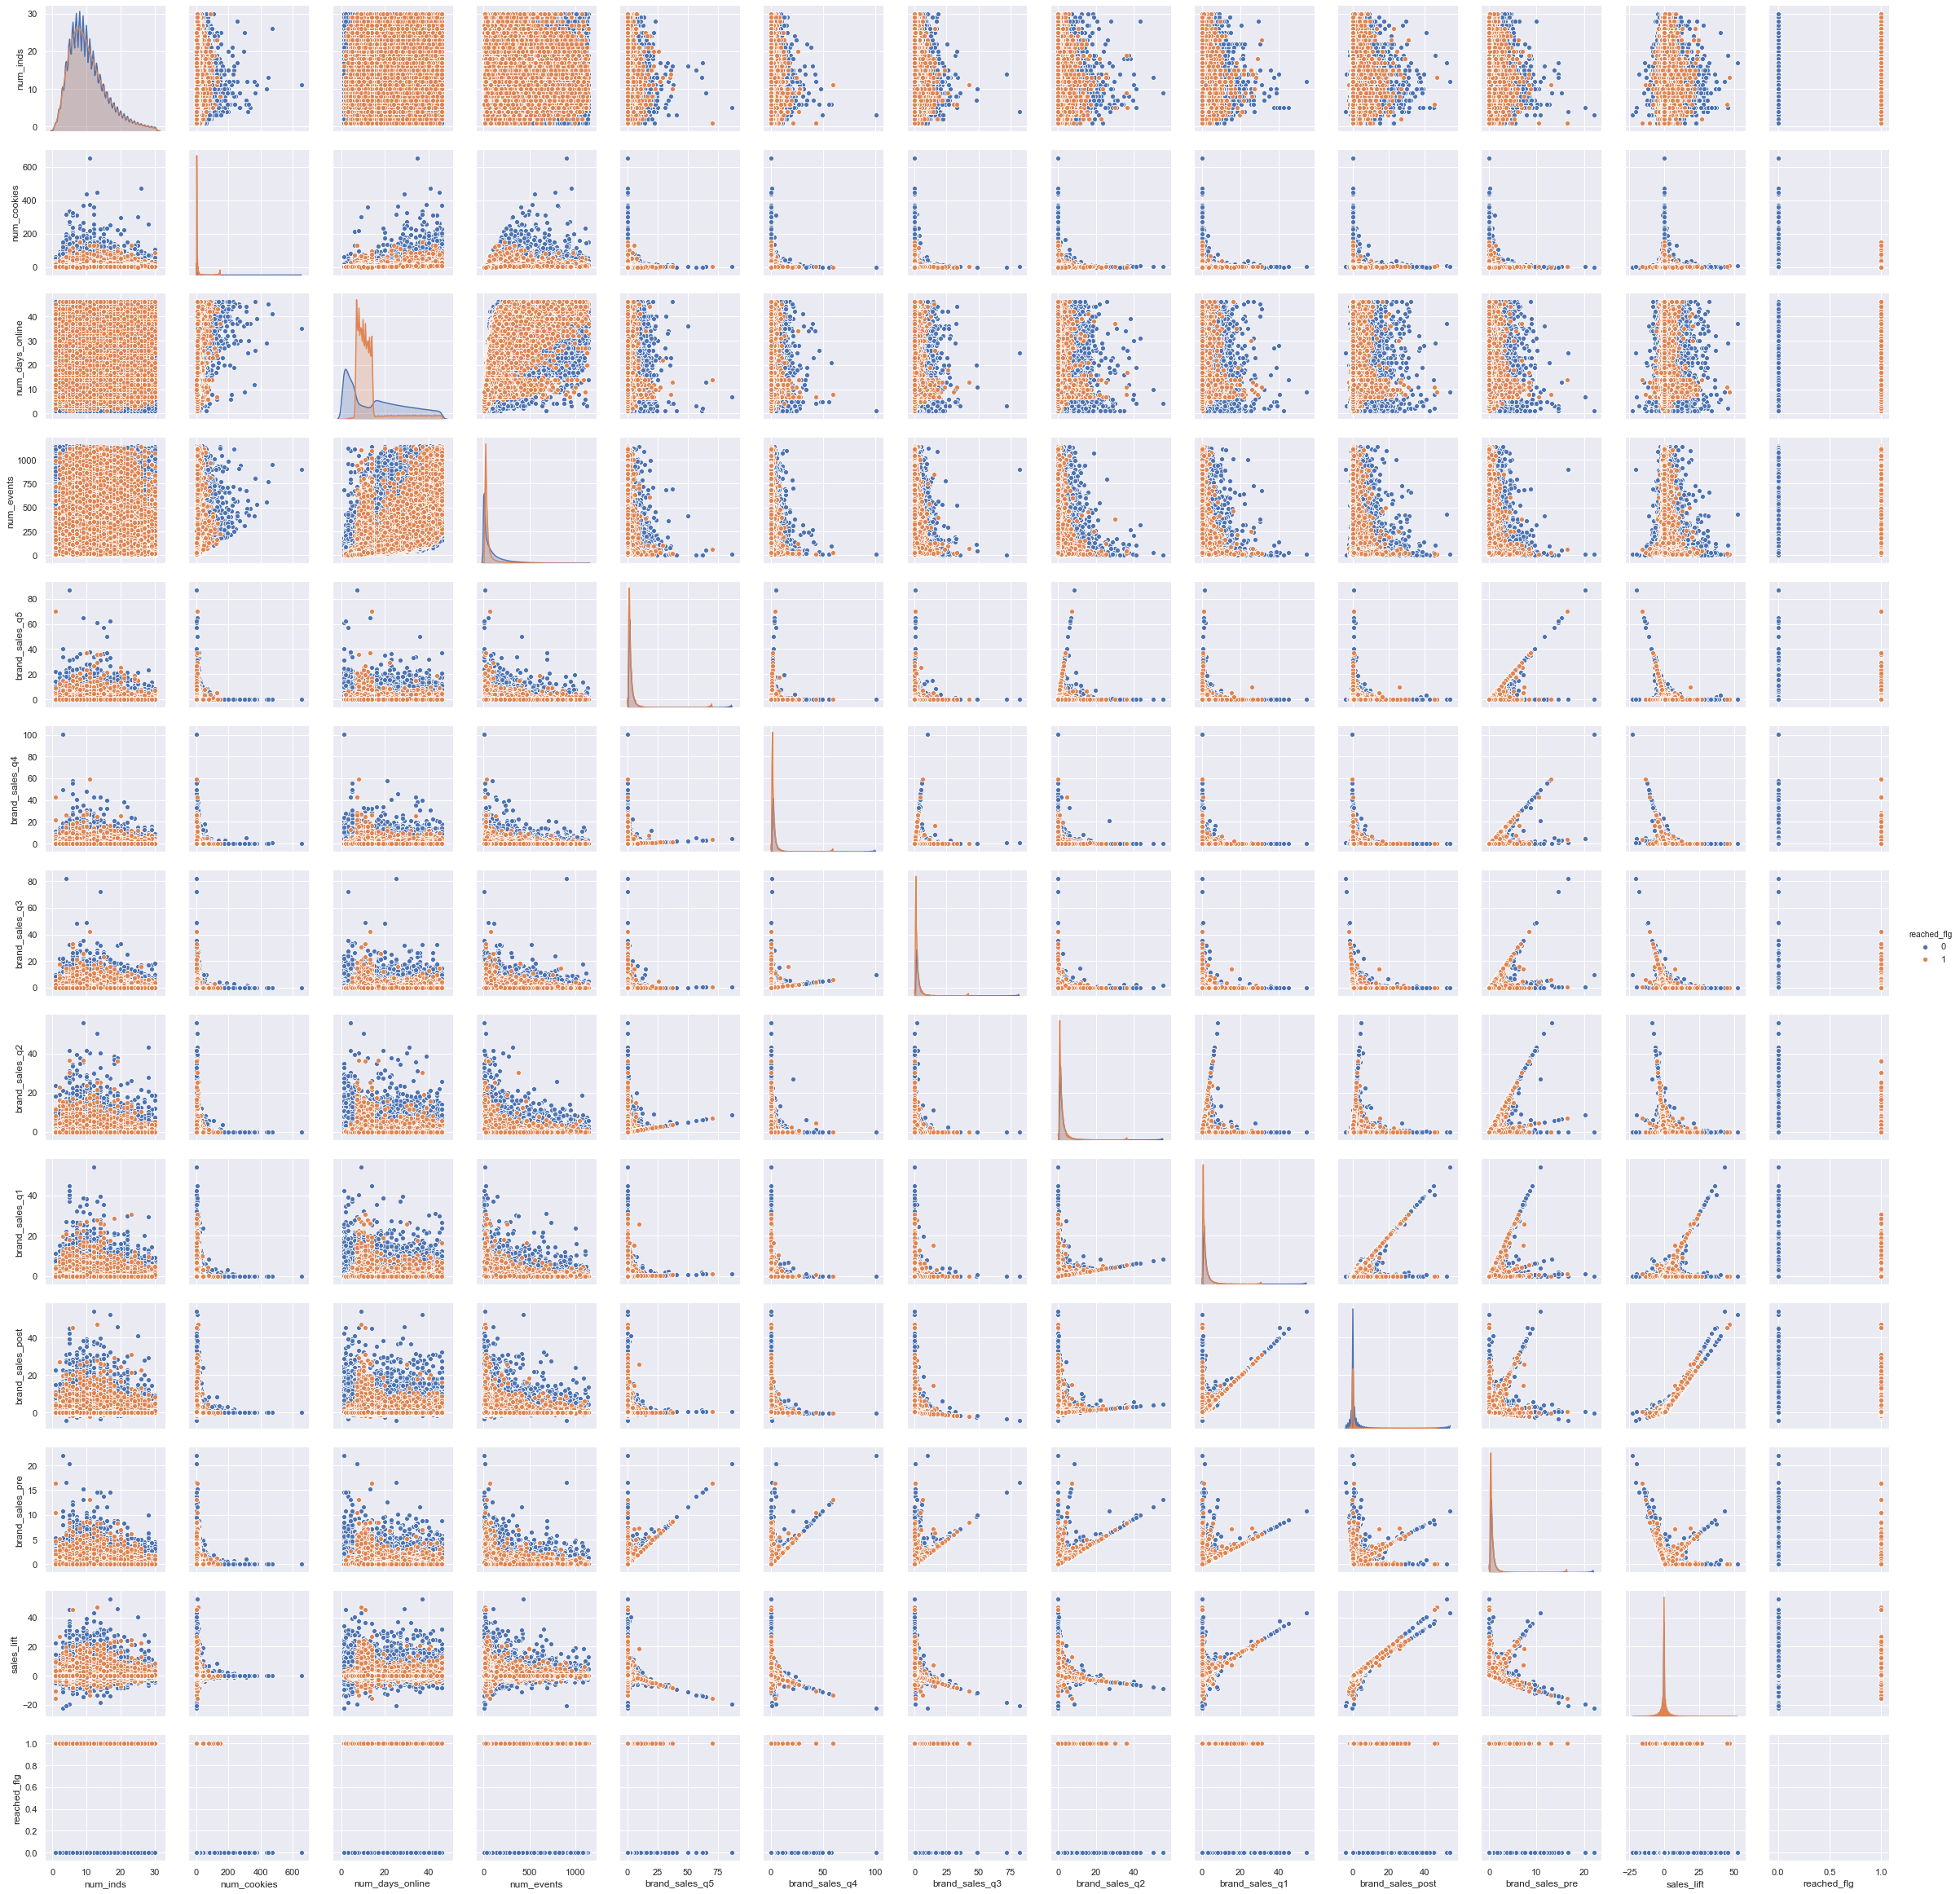

In [110]:
sns.pairplot(df_num, hue='reached_flg')

## Categorical Variable: Home Value indicator

In [1]:
def hvi(x):
    df_hvi = df[df['home_value_ind'] == x]
    x = df_hvi[df_hh.reached_flg == 0]['sales_lift']   
    y = df_hvi[df_hh.reached_flg == 1]['sales_lift']   
    f_test(x, y)
    
    
    return print(f_test(x, y))

In [2]:
hvi('501+')

NameError: name 'df' is not defined